# LDA: Linear discriminant Analysis

A prediction model for Weight Lifting based on sensors to predict how well an exercise is performed.

## Project goal

In this project we will use data from accelerometers on the belt, forearm, arm and dumbell of 6 participants.  
They were asked to perform barbell lifts correctly and incorrectly in 5 different ways.
  
More information is available from the website here: http://groupware.les.inf.puc-rio.br/har (see the section on the Weight Lifting Exercise Dataset).  
  
The goal of the project is to predict the manner in which they did the exercise. This is the “classe” variable in the data set: A - E
- exactly according to the specification (Class A)
- throwing the elbows to the front (Class B)
- lifting the dumbbell only halfway (Class C)
- lowering the dumbbell only halfway (Class D)
- throwing the hips to the front (Class E).

## Read the data

Velloso, E.; Bulling, A.; Gellersen, H.; Ugulino, W.; Fuks, H.: Qualitative Activity Recognition of Weight Lifting Exercises. Proceedings of 4th International Conference in Cooperation with SIGCHI (Augmented Human '13). Stuttgart, Germany: ACM SIGCHI, 2013 (http://groupware.les.inf.puc-rio.br/work.jsf?p1=11201).

In [1]:
import pandas as pd  # Start by importing the  data

In [2]:
X = pd.read_csv('../datasets/pml-training.csv', low_memory=False) 

In [3]:
X.shape

(19622, 160)

the data set has 19622 obs. (rows) of 160 variables (columns)

In [4]:
X.columns

Index(['Unnamed: 0', 'user_name', 'raw_timestamp_part_1',
       'raw_timestamp_part_2', 'cvtd_timestamp', 'new_window', 'num_window',
       'roll_belt', 'pitch_belt', 'yaw_belt',
       ...
       'gyros_forearm_x', 'gyros_forearm_y', 'gyros_forearm_z',
       'accel_forearm_x', 'accel_forearm_y', 'accel_forearm_z',
       'magnet_forearm_x', 'magnet_forearm_y', 'magnet_forearm_z', 'classe'],
      dtype='object', length=160)

This is not really necessary but I like to rename the first column from “X” to a meaningful name:

In [5]:
X.rename(columns = {X.columns[0] : 'ID'}, inplace = True)

In [6]:
X.head(3)

,ID,user_name,raw_timestamp_part_1,raw_timestamp_part_2,cvtd_timestamp,new_window,num_window,roll_belt,pitch_belt,yaw_belt,...,gyros_forearm_x,gyros_forearm_y,gyros_forearm_z,accel_forearm_x,accel_forearm_y,accel_forearm_z,magnet_forearm_x,magnet_forearm_y,magnet_forearm_z,classe
0,1,carlitos,1323084231,788290,05/12/2011 11:23,no,11,1.41,8.07,-94.4,...,0.03,0.00,-0.02,192,203,-215,-17,654.0,476.0,A
1,2,carlitos,1323084231,808298,05/12/2011 11:23,no,11,1.41,8.07,-94.4,...,0.02,0.00,-0.02,192,203,-216,-18,661.0,473.0,A
2,3,carlitos,1323084231,820366,05/12/2011 11:23,no,11,1.42,8.07,-94.4,...,0.03,-0.02,0.00,196,204,-213,-18,658.0,469.0,A


## Explore the data

In [7]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19622 entries, 0 to 19621
Columns: 160 entries, ID to classe
dtypes: float64(94), int64(29), object(37)
memory usage: 24.0+ MB


In [8]:
X.describe()

,ID,raw_timestamp_part_1,raw_timestamp_part_2,num_window,roll_belt,pitch_belt,yaw_belt,total_accel_belt,max_roll_belt,max_picth_belt,...,var_yaw_forearm,gyros_forearm_x,gyros_forearm_y,gyros_forearm_z,accel_forearm_x,accel_forearm_y,accel_forearm_z,magnet_forearm_x,magnet_forearm_y,magnet_forearm_z
count,19622.000000,1.962200e+04,19622.000000,19622.000000,19622.000000,19622.000000,19622.000000,19622.000000,406.000000,406.000000,...,406.000000,19622.000000,19622.000000,19622.000000,19622.000000,19622.000000,19622.000000,19622.000000,19622.000000,19622.000000
mean,9811.500000,1.322827e+09,500656.144277,430.640047,64.407197,0.305283,-11.205061,11.312608,-6.667241,12.923645,...,4639.849068,0.157951,0.075175,0.151245,-61.651819,163.655896,-55.291917,-312.575884,380.116445,393.613745
std,5664.527827,2.049277e+05,288222.879958,247.909554,62.750255,22.351242,95.193926,7.742309,94.594252,8.005960,...,7284.972361,0.648618,3.100725,1.754483,180.593687,200.130082,138.396947,346.958482,509.373742,369.268747
min,1.000000,1.322490e+09,294.000000,1.000000,-28.900000,-55.800000,-180.000000,0.000000,-94.300000,3.000000,...,0.000000,-22.000000,-7.020000,-8.090000,-498.000000,-632.000000,-446.000000,-1280.000000,-896.000000,-973.000000
25%,4906.250000,1.322673e+09,252912.250000,222.000000,1.100000,1.760000,-88.300000,3.000000,-88.000000,5.000000,...,0.274550,-0.220000,-1.460000,-0.180000,-178.000000,57.000000,-182.000000,-616.000000,2.000000,191.000000
50%,9811.500000,1.322833e+09,496380.000000,424.000000,113.000000,5.280000,-13.000000,17.000000,-5.100000,18.000000,...,612.214225,0.050000,0.030000,0.080000,-57.000000,201.000000,-39.000000,-378.000000,591.000000,511.000000
75%,14716.750000,1.323084e+09,751890.750000,644.000000,123.000000,14.900000,12.900000,18.000000,18.500000,19.000000,...,7368.414252,0.560000,1.620000,0.490000,76.000000,312.000000,26.000000,-73.000000,737.000000,653.000000
max,19622.000000,1.323095e+09,998801.000000,864.000000,162.000000,60.300000,179.000000,29.000000,180.000000,30.000000,...,39009.333330,3.970000,311.000000,231.000000,477.000000,923.000000,291.000000,672.000000,1480.000000,1090.000000


This is how the five classes are distributed:

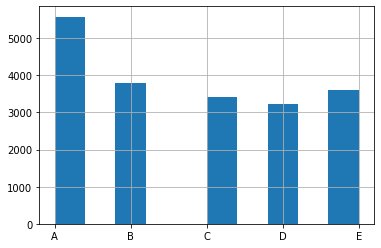

In [9]:
X.classe.hist();

Classes are almost uniformly distributed, with a small prevalence for A-class.

## Preprocess the data

In [10]:
y = X.classe.copy() # copy “y” column (the target) values out

In [11]:
X.drop(['classe'], axis=1, inplace=True) # then, drop y column

## Feature extraction

160 features are computationally expensive for the model training, so we aim to reduce them.  

### Remove user- and time-dependent features
First of all, it’s clear from the summary above that the first six variables have no use, since they are user-dependent and time-dependent; so we remove them:


In [12]:
columnsToDelete = ['ID','user_name', 'raw_timestamp_part_1', 'raw_timestamp_part_2','cvtd_timestamp', 'new_window', 'num_window']

In [13]:
X.drop(columnsToDelete, axis = 1, inplace=True)

### Remove features with missing values

In [14]:
X.isnull().values.any() 

True

From the statement above, some variables have missing values (NaN).
We could substitute them with the average for that variable but there are many missing values and this is not improving the model accuracy (I tried).
Instead of less-accurate imputation of missing data, I just remove all predictors with NA values. Hard but fair …

In [15]:
X.dropna(axis=1, inplace=True) 

In [16]:
X.shape

(19622, 52)

Finally we have reduced the dataset to **52 features**, less than one third.

In [17]:
X.head(3)

,roll_belt,pitch_belt,yaw_belt,total_accel_belt,gyros_belt_x,gyros_belt_y,gyros_belt_z,accel_belt_x,accel_belt_y,accel_belt_z,...,total_accel_forearm,gyros_forearm_x,gyros_forearm_y,gyros_forearm_z,accel_forearm_x,accel_forearm_y,accel_forearm_z,magnet_forearm_x,magnet_forearm_y,magnet_forearm_z
0,1.41,8.07,-94.4,3,0.00,0.0,-0.02,-21,4,22,...,36,0.03,0.00,-0.02,192,203,-215,-17,654.0,476.0
1,1.41,8.07,-94.4,3,0.02,0.0,-0.02,-22,4,22,...,36,0.02,0.00,-0.02,192,203,-216,-18,661.0,473.0
2,1.42,8.07,-94.4,3,0.00,0.0,-0.02,-20,5,23,...,36,0.03,-0.02,0.00,196,204,-213,-18,658.0,469.0


### Remove features with near zero variance

There is something else we can do: drop features which have a variance near zero meaning they don’t provide enough value for predictions.  
We will use the *sklearn* module VarianceThreshold to find out which features have big enough variance.

In [18]:
from sklearn.feature_selection import VarianceThreshold

In [19]:
selector = VarianceThreshold()

In [20]:
selector.fit(X)

VarianceThreshold(threshold=0.0)

Find all features with variance larger than 0.5 (you can tune it):

In [21]:
mask = selector.variances_ > 0.5  # arbitrary value 0.5

Copy all "high variance" features into a new dataframe x_hv:

In [22]:
X_hv = X.loc[:, mask == True]

In [23]:
X_hv.shape

(19622, 46)

In [24]:
totalObs = X_hv.shape[0] # this will soon come useful
totalObs

19622

Another 6 features removed.  
A final reduction could be to remove all the features that have a high correlation between them, which I skip.

## Normalisation

LDA (and in general other classification models) works better if the data set is normalised.

In [25]:
from sklearn import preprocessing

normaliser = preprocessing.Normalizer()

In [26]:
  # this will keep the columns names
xNormalised = pd.DataFrame(normaliser.fit_transform(X_hv), columns = X_hv.columns) 

## Split the data into training and testing

For each model I will measure the out of sample error that is the error rate you get on a new data set.  
The purpose of using a different data set than training is model checking. I want to validate how well the model got trained.  
I will calculate the out of sample error by looking at the accuracy.

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
Xtrain, Xtest, ytrain, ytest = train_test_split(xNormalised, y, test_size=0.2, random_state=7)

## Baseline prediction

A baseline is needed to see if any model trained is really that useful.  Can it beat the simplest baseline?   
Our baseline will be deciding randomly the "classe" category based on the frequency in the training set (classe A is 28% of the times, classe B is 19% and so on …)  
The baseline accuracy would be around 0.2, as there are five classes to choose.   
Any model with a higher accuracy than the baseline is a better model.

In [29]:
y.value_counts() # frequency of each category

A    5580
B    3797
E    3607
C    3422
D    3216
Name: classe, dtype: int64

Let's get the baseline by hard-coding the frequencies of the classes usage:

In [30]:
def baselinePredict(aNumber):
    # aNumber: expects a number between 0 and 1
    # totalObs is a global vaiable
    
    if (aNumber < 5580 / totalObs):
        return 'A'
    elif (aNumber < (5580 + 3797) / totalObs):
        return 'B'
    elif (aNumber < (5580 + 3797 + 3607) / totalObs):
        return 'C'
    elif (aNumber < (5580 + 3797 + 3607 + 3422) / totalObs):
        return 'D'
    else:
        return 'E'

Let's try a test:

In [31]:
import random

In [32]:
test = random.random() # a number between 0 and 1

baselinePredict(test)

'C'

In [33]:
yTotals = ytest.count()
correctPredictions = 0

for i in range(yTotals):
    rndPrediction = baselinePredict(random.random())
        
    if (rndPrediction == ytest.iloc[i]):
        correctPredictions += 1
        
print("Percentage of correct predictions for all test dataset: ", correctPredictions / yTotals)

Percentage of correct predictions for all test dataset:  0.209171974522293


This is our baseline. As it's random calculated, it varies; usually between 0.2 and 0.22 circa.  
  
Now we have everything to start training our models!

## Multi-class logistic: One vs All

We now train a one-versus-all model.

In [34]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC

In [35]:
modelOneVsAll = OneVsRestClassifier(SVC(kernel='linear'))

In [36]:
import time # to measure the time needed for training

In [37]:
print ("Training the One versus All model ...")
s = time.time()

modelOneVsAll.fit(Xtrain, ytrain)

print("Done! Completed in: ", time.time() - s, "seconds")

Training the One versus All model ...
Done! Completed in:  84.21062207221985 seconds


In [38]:
modelOneVsAll.score(Xtest, ytest)

0.6242038216560509

The model scores a better accuracy than the baseline **but it took a long time**.  
Using a Logistic multinomial regression hold similar accuracy results.

### Reduce even more the features

One possibility would be to apply the LR model to a **very reduced** subset of features.  
To do that we need first to find out which are the most important features.  
As we remember a good way to have them is to use a decision tree. Let's use the tree as a shortcut to find the most important features.

#### Train a decision tree

In [39]:
from sklearn.ensemble import ExtraTreesClassifier
tree = ExtraTreesClassifier()

In [42]:
tree.fit(Xtrain, ytrain)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                     oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [43]:
feat_importances = pd.Series(tree.feature_importances_, index=Xtest.columns)
feat_importances.nlargest(4)

magnet_dumbbell_z    0.052469
pitch_forearm        0.041033
roll_dumbbell        0.038611
yaw_belt             0.035835
dtype: float64

## Re-train the OneVsAll model with only the top four features.
Now that we have the top 4 features, we can train again the model only with them:

In [44]:
top4features = ['pitch_forearm', 'yaw_belt', 'magnet_dumbbell_z', 'roll_dumbbell']

In [45]:
Xtrain_reduced = Xtrain[top4features].copy()

In [46]:
Xtrain_reduced.shape

(15697, 4)

In [47]:
Xtest_reduced = Xtest[top4features].copy()

In [48]:
print ("Training the OneVsAll model on 4 features ...")
s = time.time()

modelOneVsAll.fit(Xtrain_reduced, ytrain)

print("Done! Completed in: ", time.time() - s, "seconds")

Training the OneVsAll model on 4 features ...
Done! Completed in:  18.12926197052002 seconds


In [49]:
modelOneVsAll.score(Xtest_reduced, ytest)

0.3472611464968153

Well, the time greatly reduced but the score is now very low, barely better than the baseline ...  
Not so useful. How to do?  
  
## Reduce the features using LDA
LDA comes to rescue in the form of a data reduction similar to PCA. The LDA model can be applied to the dataset and **transform it into a smaller set of components**, between 1 and the number of classes minus 1 .  
Since we have 5 classes we can reduce up to 4 components (this is why we choose earlier 4 top features)

In [50]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis # LDA

In [51]:
reduceLDA = LinearDiscriminantAnalysis(n_components = 4)
reduceLDA.fit(Xtrain, ytrain)

LinearDiscriminantAnalysis(n_components=4, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [52]:
XtrainLDAred = reduceLDA.transform(Xtrain)

In [53]:
XtestLDAred = reduceLDA.transform(Xtest)

And now we can again apply the OneVsAll model but this time to the reduced dataset:

In [54]:
print ("Training the One Vs All model on reduced 4-components dataset ...")
s = time.time()

modelOneVsAll.fit(XtrainLDAred, ytrain)

print("Done! Completed in: ", time.time() - s, "seconds")

Training the One Vs All model on reduced 4-components dataset ...
Done! Completed in:  35.30073118209839 seconds


In [55]:
modelOneVsAll.score(XtestLDAred, ytest)

0.6868789808917197

The score is now similar to the one using the entire dataset but the training is much faster.  
This shows how the LDA data reduction can help to have good results and times by applying the model on a reduced dataset.

## LDA Model

But LDA can do more: it can also be used as a classifier directly!  
We will train it (and time this) on the original dataset, not the reduced one; the LDA classifier will automatically reduce the dataset.

In [56]:
modelLDA = LinearDiscriminantAnalysis()

In [57]:
print ("Training the LDA model ...")
s = time.time()

modelLDA.fit(Xtrain, ytrain)

print("Done! Completed in: ", time.time() - s, "seconds")

Training the LDA model ...
Done! Completed in:  0.34035611152648926 seconds


In [58]:
print("LDA Model accuracy:", modelLDA.score(Xtest,ytest))

LDA Model accuracy: 0.6942675159235668


Great! The LDA model is much better than the baseline and similar to the OneVsAll results plus it was quite fast.  
  
Note: 70% of correct predictions is not exactly perfect but it was not the goal of this exercise: you can get almost perfect results using decision trees or random forests. 

In [59]:
tree.score(Xtest, ytest)

0.9885350318471338